In [48]:
from sklearn.ensemble import RandomForestClassifier
import  pandas as pd
import numpy as py
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

a1=pd.read_csv("E:///python代码/lx-yk/data-yk/yk1/winequality-red.csv",sep=",")
# 1）查看前5行（2分）
print(a1.head())
# 2）查看数据信息（2分）
print("查看数据信息\n",a1.info)
# 3）查看基本统计信息（2分）
print("查看基本统计信息\n",a1.describe())
# 4）查看数据的行数和列数（2分）
print("查看数据的行数和列数\n",a1.shape)
# # 2、自主划分训练集、验证集或测试集(2分)
x=a1.drop('quality',axis=1)
y=a1['quality']
y=py.where(y>4,1,0)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=50)
# 3、自主选择两种算法进行数据建模。（2分）
# ---------------------逻辑回归------------分类的---------
lr=LogisticRegression(penalty='l2',fit_intercept=True,C=1.0,max_iter=1000)
lr.fit(X_train, y_train)
#---------------------随机森林-------------分类的---------
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
tree=RandomForestClassifier(max_depth=1000)
tree.fit(X_train, y_train)
# 4、在训练集和测试集上测试该模型的准确性，并展示出该模型的训练准确率和测试准确率（5分）
# ---------------------逻辑回归------------准确性---------
yc_lr1=lr.predict(X_train)
zq_lr1=accuracy_score(yc_lr1,y_train)
print("=======逻辑回归预测1=========\n",yc_lr1)
yc_lr2=lr.predict(X_test)
zq_lr2=accuracy_score(yc_lr2,y_test)
print("=======逻辑回归训练准确率=========\n",yc_lr2)
print("=======逻辑回归预测2=========\n",zq_lr1)
print("=======逻辑回归测试准确率=========\n",zq_lr2)

#---------------------随机森林-------------准确性---------
yc_tree1=tree.predict(X_train)
yc_tree2=tree.predict(X_test)
zq_tree1=accuracy_score(yc_tree1,y_train)
zq_tree2=accuracy_score(yc_tree2,y_test)
print("随机森林预测1\n",yc_tree1)
print("=======随机森林预测2=========\n",yc_tree2)
print("随机森林训练准确率",zq_tree1)
print("随机森林训练准确率",zq_tree2)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [46]:

# 5、使用K折交叉验证进行参数调优，直到获得最优模型（5分）
#K折交叉验证
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# 逻辑回归 的网络参数
lj_cs={'fit_intercept':[True, False],'C': [0.01, 0.1, 1.0, 10.0],'max_iter':[1000,1500,2000]}
# 对逻辑回归进行参数调优
ljt=GridSearchCV(estimator=lr,param_grid=lj_cs,cv=kf,scoring='accuracy')
ljt.fit(X_train,y_train)# 拟合模型
o1=ljt.score(X_train,y_train)
lj_ty=ljt.best_estimator_
print("逻辑回归进行参数调优\n",lj_ty)
print(o1)

逻辑回归进行参数调优
 LogisticRegression(C=10.0, fit_intercept=False, max_iter=1000)
0.9609069585613761


In [45]:
# 随机森林 的网络参数
sj_cs={'n_estimators':[100,200],'min_samples_split':[2,3,4],'max_depth':[5,10,20]}
# 对随机森林进行参数调优
sjt=GridSearchCV(estimator=tree,param_grid=sj_cs,cv=kf,scoring='accuracy')
sjt.fit(X_train,y_train)
sjt.score(X_train,y_train)
o2=sjt.score(X_train,y_train)
sj_ty=sjt.best_estimator_
print("随机森林进行参数调优\n",sj_ty)
print(o2)

随机森林进行参数调优
 RandomForestClassifier(max_depth=10)
0.9898358092259578


In [47]:
# 6、模型评估：使用你认为合适的指标评估模型。（至少两种）（5分）
# 对逻辑回归进预测
ljy=ljt.predict(X_test)
lr_accuracy = accuracy_score(y_test, ljy)
lr_precision = precision_score(y_test, ljy)
lr_recall = recall_score(y_test, ljy)
lr_f1 = f1_score(y_test, ljy)
print("逻辑回归准确率：", lr_accuracy)
print("逻辑回归精确率：", lr_precision)
print("逻辑回归召回率：", lr_recall)
print("逻辑回归 F1 分数：", lr_f1)
# 对随机森林进预测
sjy=sjt.predict(X_test)
tree_accuracy = accuracy_score(y_test, sjy)
tree_precision = precision_score(y_test, sjy)
tree_recall = recall_score(y_test, sjy)
tree_f1 = f1_score(y_test, sjy)

print("随机森林准确率：", tree_accuracy)
print("随机森林精确率：", tree_precision)
print("随机森林召回率：", tree_recall)
print("随机森林 F1 分数：", tree_f1)

逻辑回归准确率： 0.9625
逻辑回归精确率： 0.9684542586750788
逻辑回归召回率： 0.9935275080906149
逻辑回归 F1 分数： 0.9808306709265175
随机森林准确率： 0.9625
随机森林精确率： 0.9684542586750788
随机森林召回率： 0.9935275080906149
随机森林 F1 分数： 0.9808306709265175


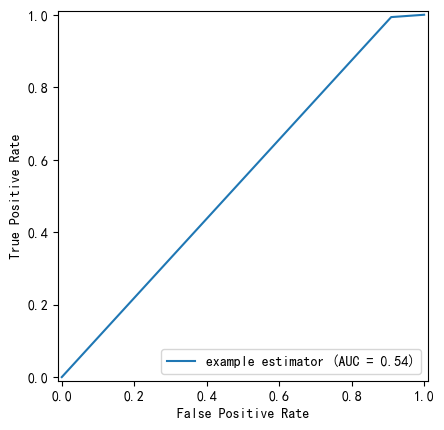

In [38]:
from sklearn.metrics import auc, RocCurveDisplay
# 7、绘制出模型的AUC曲线下面积，并输出最优模型的权重系数，并对样本进行预测。（8分）
#逻辑回归的AUC值
# t7=lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, ljy)
t7=auc(fpr, tpr)
display=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=t7, estimator_name='example estimator')
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False
display.plot()
plt.show()


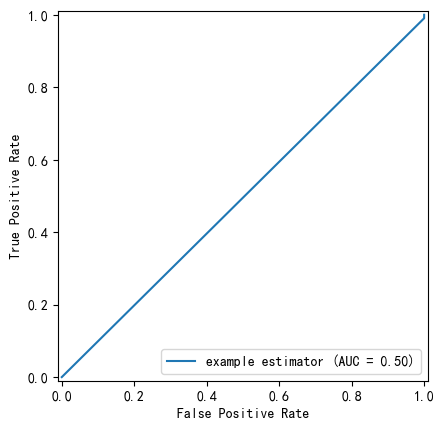

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, sjy)
t7_0=auc(fpr, tpr)
display=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=t7_0, estimator_name='example estimator')
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False
display.plot()
plt.show()


In [49]:
#逻辑回归
t7_1=ljt.best_estimator_
t7_1.coef_#系数

array([[ 0.16196911, -5.05762746, -1.67345894, -0.22357707, -1.65163559,
         0.02358716,  0.01717813,  2.46568773, -0.84886218,  0.89720827,
         0.4655034 ]])

In [50]:
#随机森林
t7_2=sjt.best_estimator_
t7_2.feature_importances_

array([0.09264532, 0.19049007, 0.06635584, 0.08515369, 0.0797017 ,
       0.05553874, 0.08837655, 0.06711423, 0.08740488, 0.09641433,
       0.09080464])